In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import appid

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

weather_df = pd.read_csv(output_data_file)
weather_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [3]:
#Create a Data Frame to Hold Output Data
weather_output_df = pd.DataFrame(columns=['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'])
weather_output_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [4]:
#Perform API Calls

#Code from APIs Day 3 Activity 5, ShoutOut to Matt Johnson for Reminding Me to Remove the '==' and Start Filling an Empty DF
#Print Title
print('Beginning Data Retrieval')
print('--------------------------------')
#Iterate Through the Cities
for index, row in weather_df.iterrows():
    #Assign the Base URL
    base_url = 'http://api.openweathermap.org/data/2.5/weather'
    #Assign the Parameters
    params = {'q':cities[index], 'appid':appid, 'units':'imperial'}
    #Obtain the Response
    response = requests.get(base_url, params=params).json()
    #See if A Given City is in the List
    try:
        weather_output_df.loc[index, "City" ] = response['name']
        weather_output_df.loc[index, "Cloudiness"] = response['clouds']['all']
        weather_output_df.loc[index, "Country"] = response['sys']['country']
        weather_output_df.loc[index, "Date"] = response['dt']
        weather_output_df.loc[index, "Humidity"] = response['main']['humidity']
        weather_output_df.loc[index, "Lat"] = response['coord']['lat']
        weather_output_df.loc[index, "Lng"] = response['coord']['lon']
        weather_output_df.loc[index, "Max Temp"] = response['main']['temp_max']
        weather_output_df.loc[index, "Wind Speed"] = response['wind']['speed']
        print(f"Processing record {index} | {cities[index]}")
    except (KeyError, IndexError):
        print("City not Found. Skipping...")
        
print('---------------------------------')
print('Data Retrieval Complete')
print('---------------------------------')

Beginning Data Retrieval
--------------------------------
Processing record 0 | ushuaia
Processing record 1 | ribeira grande
Processing record 2 | sitka
Processing record 3 | kapaa
Processing record 4 | fairbanks
Processing record 5 | hvide sande
Processing record 6 | vaini
Processing record 7 | albany
Processing record 8 | luena
Processing record 9 | meulaboh
Processing record 10 | hermanus
Processing record 11 | cabo san lucas
Processing record 12 | ponta do sol
Processing record 13 | acarau
Processing record 14 | hobart
Processing record 15 | punta arenas
Processing record 16 | dikson
Processing record 17 | east london
Processing record 18 | nacala
City not Found. Skipping...
City not Found. Skipping...
Processing record 21 | rikitea
Processing record 22 | rajgurunagar
Processing record 23 | lianyuan
Processing record 24 | rafaela
Processing record 25 | nikolskoye
Processing record 26 | tiksi
Processing record 27 | butaritari
Processing record 28 | tasiilaq
Processing record 29 | mu

Processing record 251 | marzuq
City not Found. Skipping...
Processing record 253 | iqaluit
Processing record 254 | kijang
Processing record 255 | boa vista
Processing record 256 | arlit
City not Found. Skipping...
City not Found. Skipping...
Processing record 259 | whithorn
Processing record 260 | narsaq
Processing record 261 | xuanhua
Processing record 262 | noumea
Processing record 263 | cherskiy
Processing record 264 | wageningen
Processing record 265 | ravar
City not Found. Skipping...
Processing record 267 | bara
Processing record 268 | berdigestyakh
City not Found. Skipping...
Processing record 270 | pisco
Processing record 271 | mortka
Processing record 272 | kiunga
City not Found. Skipping...
Processing record 274 | vardo
Processing record 275 | garowe
Processing record 276 | porto belo
Processing record 277 | ojuelos de jalisco
Processing record 278 | terrell
Processing record 279 | taitung
Processing record 280 | kudahuvadhoo
Processing record 281 | padang
Processing record 2

Processing record 506 | burley
Processing record 507 | mizan teferi
Processing record 508 | palembang
Processing record 509 | carndonagh
Processing record 510 | agadir
Processing record 511 | mirnyy
Processing record 512 | porto novo
Processing record 513 | grand forks
Processing record 514 | gondanglegi
Processing record 515 | goderich
Processing record 516 | santa elena
Processing record 517 | aden
City not Found. Skipping...
City not Found. Skipping...
Processing record 520 | kidal
Processing record 521 | kurumkan
Processing record 522 | alofi
Processing record 523 | akdepe
Processing record 524 | kayasula
Processing record 525 | margate
Processing record 526 | phonhong
Processing record 527 | touros
Processing record 528 | siyabuswa
Processing record 529 | bac lieu
Processing record 530 | liepaja
Processing record 531 | klimovo
Processing record 532 | boyabat
City not Found. Skipping...
Processing record 534 | lorengau
Processing record 535 | kargopol
Processing record 536 | jasper

In [5]:
#Find the Types of Values for a Query
base_url = 'http://api.openweathermap.org/data/2.5/weather'
params = {'q':'souillac', 'units':'metric', 'appid':appid}
response = requests.get(base_url, params=params).json()
response

{'coord': {'lon': 57.52, 'lat': -20.52},
 'weather': [{'id': 521,
   'main': 'Rain',
   'description': 'shower rain',
   'icon': '09n'}],
 'base': 'stations',
 'main': {'temp': 26.3,
  'feels_like': 32.54,
  'temp_min': 26,
  'temp_max': 26.67,
  'pressure': 1007,
  'humidity': 100},
 'visibility': 10000,
 'wind': {'speed': 1.45, 'deg': 9},
 'clouds': {'all': 75},
 'dt': 1583103143,
 'sys': {'type': 1,
  'id': 2061,
  'country': 'MU',
  'sunrise': 1583114877,
  'sunset': 1583159787},
 'timezone': 14400,
 'id': 933995,
 'name': 'Souillac',
 'cod': 200}

In [6]:
#Return the City Count with Data
weather_output_df = weather_output_df.reset_index(drop=True)
weather_output_df.count()
weather_output_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,20,AR,1583103199,84,-54.8,-68.3,57.2,11.41
1,Ribeira Grande,91,PT,1583103199,93,38.52,-28.7,59.99,12.77
2,Sitka,90,US,1583103199,86,57.05,-135.33,41,25.28
3,Kapaa,20,US,1583103199,39,22.08,-159.32,84.2,14.99
4,Fairbanks,90,US,1583102934,84,64.84,-147.72,15.8,4.7
...,...,...,...,...,...,...,...,...,...
490,Notre-Dame-du-Lac,75,CA,1583103251,67,47.61,-68.8,19.4,10.29
491,Bilibino,97,RU,1583103251,98,68.05,166.44,-8.81,2.13
492,Uri,0,IN,1583103251,72,34.08,74.03,35.98,7.63
493,Tupiza,38,BO,1583103251,73,-21.45,-65.72,50.04,7.31


In [7]:
#Export to a CSV File
weather_output_df.to_csv("Weather_Output.csv")
weather_output_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,20,AR,1583103199,84,-54.8,-68.3,57.2,11.41
1,Ribeira Grande,91,PT,1583103199,93,38.52,-28.7,59.99,12.77
2,Sitka,90,US,1583103199,86,57.05,-135.33,41,25.28
3,Kapaa,20,US,1583103199,39,22.08,-159.32,84.2,14.99
4,Fairbanks,90,US,1583102934,84,64.84,-147.72,15.8,4.7


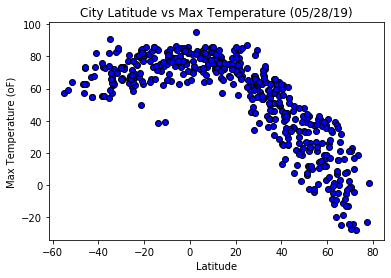

This Scatter Plot is determining the relationship between the max temperature in a city and its latitude.
The data shows that the temperature increases in proximity to the equator.


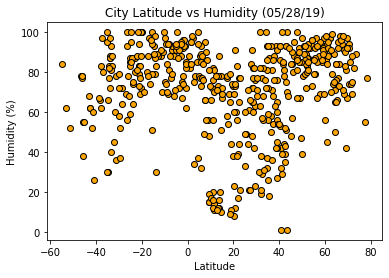

This Scatter Plot is determining the relationship between the humidity in a city and its latitude.
There does not appear to be a correlation between the humidity and latitude of a city.


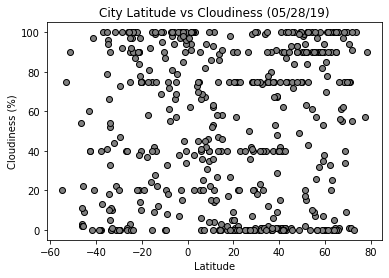

This Scatter Plot is determining the relationship between the cloudiness in a city and its latitude.
There does not appear to be a correlation between the cloudiness and latitude of a city.


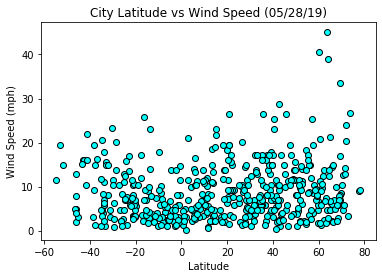

This Scatter Plot is determining the relationship between the wind speed in a city and its latitude.
There does not appear to be a correlation between the wind speed and latitude of a city.


<Figure size 432x288 with 0 Axes>

In [21]:
#Create Scatter Plots

#Temperature(oF) vs Latitude
temp_plot = plt.scatter(weather_output_df['Lat'], weather_output_df['Max Temp'], c="blue", edgecolors="black")
plt.title("City Latitude vs Max Temperature (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (oF)")
plt.show()

print("This Scatter Plot is determining the relationship between the max temperature in a city and its latitude.")
print("The data shows that the temperature increases in proximity to the equator.")
#Export to a PNG File
#Method Found on https://stackoverflow.com/questions/9622163/save-plot-to-image-file-instead-of-displaying-it-using-matplotlib
plt.savefig("Temperature vs Latitude.png", bbox_inches='tight')

#Humidity% vs Latitude
humid_plot = plt.scatter(weather_output_df['Lat'], weather_output_df['Humidity'], c="orange", edgecolors="black")
plt.title("City Latitude vs Humidity (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

print("This Scatter Plot is determining the relationship between the humidity in a city and its latitude.")
print("There does not appear to be a correlation between the humidity and latitude of a city.")
#Export to a PNG File
#Method Found on https://stackoverflow.com/questions/9622163/save-plot-to-image-file-instead-of-displaying-it-using-matplotlib
plt.savefig("Humidity vs Latitude.png", bbox_inches='tight')

#Cloudiness vs Latitude
cloud_plot = plt.scatter(weather_output_df['Lat'], weather_output_df['Cloudiness'], c="gray", edgecolors="black")
plt.title("City Latitude vs Cloudiness (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

print("This Scatter Plot is determining the relationship between the cloudiness in a city and its latitude.")
print("There does not appear to be a correlation between the cloudiness and latitude of a city.")
#Export to a PNG File
#Method Found on https://stackoverflow.com/questions/9622163/save-plot-to-image-file-instead-of-displaying-it-using-matplotlib
plt.savefig("Cloudiness vs Latitude.png", bbox_inches='tight')

#Wind Speed vs Latitude
wind_plot = plt.scatter(weather_output_df['Lat'], weather_output_df['Wind Speed'], c="cyan", edgecolors="black")
plt.title("City Latitude vs Wind Speed (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

print("This Scatter Plot is determining the relationship between the wind speed in a city and its latitude.")
print("There does not appear to be a correlation between the wind speed and latitude of a city.")
#Export to a PNG File
#Method Found on https://stackoverflow.com/questions/9622163/save-plot-to-image-file-instead-of-displaying-it-using-matplotlib
plt.savefig("Wind Speed vs Latitude.png", bbox_inches='tight')